In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
%matplotlib inline

In [6]:
import os
os.getcwd()

'C:\\Users\\hp\\MTECH PROJECT'

In [7]:
Dataset=pd.read_excel('ModelDataset.xlsx')
Dataset.head()

,H2/CO2,H2/CO,Temp,Pres,PrepM,GHSV,W/F,Catalyst,BET SA,Pore Vol,...,Catalyst E3,Comp E3,Catalyst E4,Comp E4,CO2 Conv,CO Conv,Methanol STY,DME STY,Methanol Sel,DME Sel
0,3.00,NaN,513,4.0,DPM,NaN,14.93,CuZnAl-3,90.0,0.19,...,NaN,NaN,Al2O3,0.6639,17.4,NaN,1.5625,NaN,54.2,NaN
1,3.03,NaN,513,4.0,SSIE,NaN,25.60,CuZnAl-400,NaN,NaN,...,NaN,NaN,Al2O3,0.0790,59.8,NaN,5.6700,NaN,73.9,NaN
2,3.03,NaN,533,3.0,SSIE,NaN,25.60,CuZnAl-400,NaN,NaN,...,NaN,NaN,Al2O3,0.0790,58.2,NaN,4.6242,NaN,62.5,NaN
3,3.03,NaN,513,3.0,SSIE,NaN,25.60,CuZnAl-400,NaN,NaN,...,NaN,NaN,Al2O3,0.0790,49.9,NaN,4.0900,NaN,64.5,NaN
4,3.03,NaN,513,2.0,SSIE,NaN,25.60,CuZnAl-400,NaN,NaN,...,NaN,NaN,Al2O3,0.0790,40.0,NaN,6.7662,NaN,54.1,NaN


# EDA and FEATURE ENGG

In [8]:
Dataset=Dataset.drop(columns=['H2/CO','GHSV','Catalyst','Catalyst E1','Catalyst E2','Catalyst E3','Catalyst E4','CO Conv','DME STY','DME Sel'],axis=1)
Dataset.head()

,H2/CO2,Temp,Pres,PrepM,W/F,BET SA,Pore Vol,Pore Size,Crystal Size,Metal SA,Comp E1,Comp E2,Comp E3,Comp E4,CO2 Conv,Methanol STY,Methanol Sel
0,3.00,513,4.0,DPM,14.93,90.0,0.19,5.67,13.3,31.6,0.2340,0.102,NaN,0.6639,17.4,1.5625,54.2
1,3.03,513,4.0,SSIE,25.60,NaN,NaN,NaN,NaN,NaN,0.6375,0.283,NaN,0.0790,59.8,5.6700,73.9
2,3.03,533,3.0,SSIE,25.60,NaN,NaN,NaN,NaN,NaN,0.6375,0.283,NaN,0.0790,58.2,4.6242,62.5
3,3.03,513,3.0,SSIE,25.60,NaN,NaN,NaN,NaN,NaN,0.6375,0.283,NaN,0.0790,49.9,4.0900,64.5
4,3.03,513,2.0,SSIE,25.60,NaN,NaN,NaN,NaN,NaN,0.6375,0.283,NaN,0.0790,40.0,6.7662,54.1


In [9]:
Dataset.isnull().sum()

H2/CO2            0
Temp              0
Pres              0
PrepM             0
W/F             100
BET SA           72
Pore Vol        154
Pore Size       218
Crystal Size    148
Metal SA        155
Comp E1           0
Comp E2         126
Comp E3         272
Comp E4           6
CO2 Conv         17
Methanol STY     36
Methanol Sel     17
dtype: int64

In [10]:
#HANDLING NULL VALUES

In [11]:
Dataset['Comp E2']=Dataset['Comp E2'].fillna(0)
Dataset['Comp E3']=Dataset['Comp E3'].fillna(0)
Dataset['Comp E4']=Dataset['Comp E4'].fillna(0)

Dataset.isnull().sum()

H2/CO2            0
Temp              0
Pres              0
PrepM             0
W/F             100
BET SA           72
Pore Vol        154
Pore Size       218
Crystal Size    148
Metal SA        155
Comp E1           0
Comp E2           0
Comp E3           0
Comp E4           0
CO2 Conv         17
Methanol STY     36
Methanol Sel     17
dtype: int64

In [12]:
Dataset['W/F']=Dataset['W/F'].fillna(Dataset['W/F'].median())
Dataset['BET SA']=Dataset['BET SA'].fillna(Dataset['BET SA'].median())
Dataset['Pore Vol']=Dataset['Pore Vol'].fillna(Dataset['Pore Vol'].median())
Dataset['Pore Size']=Dataset['Pore Size'].fillna(Dataset['Pore Size'].median())
Dataset['Crystal Size']=Dataset['Crystal Size'].fillna(Dataset['Crystal Size'].median())
Dataset['Metal SA']=Dataset['Metal SA'].fillna(Dataset['Metal SA'].median())
Dataset['CO2 Conv']=Dataset['CO2 Conv'].fillna(Dataset['CO2 Conv'].median())
Dataset['Methanol STY']=Dataset['Methanol STY'].fillna(Dataset['Methanol STY'].median())
Dataset['Methanol Sel']=Dataset['Methanol Sel'].fillna(Dataset['Methanol Sel'].mean())

Dataset.isnull().sum()


H2/CO2          0
Temp            0
Pres            0
PrepM           0
W/F             0
BET SA          0
Pore Vol        0
Pore Size       0
Crystal Size    0
Metal SA        0
Comp E1         0
Comp E2         0
Comp E3         0
Comp E4         0
CO2 Conv        0
Methanol STY    0
Methanol Sel    0
dtype: int64

In [13]:
#LABEL ENCODING for Preparation Method

In [14]:
label_encoder = LabelEncoder()
Dataset['PrepM']=label_encoder.fit_transform(Dataset['PrepM'])

In [15]:
Dataset

,H2/CO2,Temp,Pres,PrepM,W/F,BET SA,Pore Vol,Pore Size,Crystal Size,Metal SA,Comp E1,Comp E2,Comp E3,Comp E4,CO2 Conv,Methanol STY,Methanol Sel
0,3.00,513,4.0,7,14.93,90.0,0.19,5.670,13.3,31.6,0.2340,0.1020,0.0,0.6639,17.40,1.562500,54.2
1,3.03,513,4.0,15,25.60,84.0,0.38,6.755,14.2,16.9,0.6375,0.2830,0.0,0.0790,59.80,5.670000,73.9
2,3.03,533,3.0,15,25.60,84.0,0.38,6.755,14.2,16.9,0.6375,0.2830,0.0,0.0790,58.20,4.624200,62.5
3,3.03,513,3.0,15,25.60,84.0,0.38,6.755,14.2,16.9,0.6375,0.2830,0.0,0.0790,49.90,4.090000,64.5
4,3.03,513,2.0,15,25.60,84.0,0.38,6.755,14.2,16.9,0.6375,0.2830,0.0,0.0790,40.00,6.766200,54.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,4.00,573,4.0,9,2.99,84.0,0.38,6.755,14.1,16.9,0.0900,0.0000,0.0,0.9100,9.77,3.008875,24.0
364,4.00,573,4.0,9,2.99,84.0,0.38,6.755,14.8,16.9,0.0900,0.0415,0.0,0.8685,9.77,18.360000,61.0
365,4.00,573,4.0,9,2.99,84.0,0.38,6.755,9.8,16.9,0.0900,0.0830,0.0,0.8270,9.77,3.008875,42.0
366,4.00,573,4.0,9,2.99,84.0,0.38,6.755,16.8,16.9,0.0900,0.1660,0.0,0.7440,9.77,3.008875,23.0


# CATALYST PROPERTY DATASET

In [16]:
Final_Property=pd.read_excel('Final_Properties_Dataset.xlsx')
Final_Property.head()

,Unnamed: 0,0,1,2,3,0.1,1.1,2.1,3.1,0.2,1.2,2.2,3.2,0.3,1.3,2.3,3.3
0,0,-2.163904,-0.235893,0.134307,-0.16925,5.468336,-0.017013,0.086466,0.044613,-2.166423,-0.133318,0.051257,0.028417,2.544792,2.618640,-1.141347,-0.941758
1,1,-2.163904,-0.235893,0.134307,-0.16925,5.468336,-0.017013,0.086466,0.044613,3.667065,5.308746,-1.578361,-0.037856,2.544792,2.618640,-1.141347,-0.941758
2,2,-2.163904,-0.235893,0.134307,-0.16925,5.468336,-0.017013,0.086466,0.044613,5.629532,0.159802,-2.370646,-0.844979,2.544792,2.618640,-1.141347,-0.941758
3,3,-2.163904,-0.235893,0.134307,-0.16925,-2.791727,-0.843302,-0.195338,-0.013917,-2.166423,-0.133318,0.051257,0.028417,-3.240133,-1.222075,0.007181,-0.272100
4,4,-2.163904,-0.235893,0.134307,-0.16925,-2.791727,-0.843302,-0.195338,-0.013917,4.780416,4.929572,-1.080709,0.027817,-3.240133,-1.222075,0.007181,-0.272100


# FINAL DATASET

In [17]:
Data=pd.concat([Dataset,Final_Property],axis=1)
Data.head()

,H2/CO2,Temp,Pres,PrepM,W/F,BET SA,Pore Vol,Pore Size,Crystal Size,Metal SA,...,2.1,3.1,0.2,1.2,2.2,3.2,0.3,1.3,2.3,3.3
0,3.00,513,4.0,7,14.93,90.0,0.19,5.670,13.3,31.6,...,0.086466,0.044613,-2.166423,-0.133318,0.051257,0.028417,2.544792,2.618640,-1.141347,-0.941758
1,3.03,513,4.0,15,25.60,84.0,0.38,6.755,14.2,16.9,...,0.086466,0.044613,3.667065,5.308746,-1.578361,-0.037856,2.544792,2.618640,-1.141347,-0.941758
2,3.03,533,3.0,15,25.60,84.0,0.38,6.755,14.2,16.9,...,0.086466,0.044613,5.629532,0.159802,-2.370646,-0.844979,2.544792,2.618640,-1.141347,-0.941758
3,3.03,513,3.0,15,25.60,84.0,0.38,6.755,14.2,16.9,...,-0.195338,-0.013917,-2.166423,-0.133318,0.051257,0.028417,-3.240133,-1.222075,0.007181,-0.272100
4,3.03,513,2.0,15,25.60,84.0,0.38,6.755,14.2,16.9,...,-0.195338,-0.013917,4.780416,4.929572,-1.080709,0.027817,-3.240133,-1.222075,0.007181,-0.272100


In [18]:
X=Data.drop(columns=['CO2 Conv','Methanol STY','Methanol Sel'])
X.shape


(368, 31)

In [19]:
Y=Data['CO2 Conv']
Y.shape


(368,)

In [20]:
#DATA STANDARDIZATION

In [21]:
scaling=StandardScaler()
X=scaling.fit_transform(X)
X.shape

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


(368, 31)

# ANN

In [22]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm


In [23]:
#TrainTestSplit
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(294, 31)
(74, 31)
(294,)
(74,)


In [24]:
#HYPERPARAMETER TUNING

In [25]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),loss='mean_squared_error',metrics='mean_squared_error')
    return model

In [26]:
tuner = RandomSearch(build_model,objective='val_loss',max_trials=10,executions_per_trial=3,directory='PROJECT',project_name='CO2 to methanol Conversion')


INFO:tensorflow:Reloading Oracle from existing project PROJECT\CO2 to methanol Conversion\oracle.json
INFO:tensorflow:Reloading Tuner from PROJECT\CO2 to methanol Conversion\tuner0.json


In [27]:
tuner.search_space_summary()

Search space summary
Default search space size: 21
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [28]:
tuner.search(X_train, Y_train, epochs=100, callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=3)], validation_data=(X_test, Y_test))


INFO:tensorflow:Oracle triggered exit


In [29]:
tuner.results_summary()

Results summary
Results in PROJECT\CO2 to methanol Conversion
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 4
units_0: 128
units_1: 192
learning_rate: 0.01
units_2: 192
units_3: 288
units_4: 416
units_5: 224
units_6: 160
units_7: 128
units_8: 64
units_9: 64
units_10: 192
units_11: 160
units_12: 192
units_13: 480
units_14: 384
units_15: 384
units_16: 64
units_17: 480
units_18: 160
Score: 8.073163032531738
Trial summary
Hyperparameters:
num_layers: 19
units_0: 448
units_1: 288
learning_rate: 0.0001
units_2: 416
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
units_16: 32
units_17: 32
units_18: 32
Score: 9.088552792867025
Trial summary
Hyperparameters:
num_layers: 6
units_0: 224
units_1: 32
learning_rate: 0.001
units_2: 352
units_3: 128
units_4: 256
units_5: 160
units_6: 448
units_7: 384
units_8: 320
units_9: 288
units_10: 96
units_11: 448
units_12: 352
uni

In [30]:
# ANN 

In [53]:
model = Sequential()


model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(192, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(192, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(288, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(384, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(384, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(96, activation='relu'))
#model.add(Dense(384, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(288, activation='relu'))
#model.add(Dropout(0.1))
#model.add(Dense(352, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(160, activation='relu'))
#model.add(Dense(352, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(288, activation='relu'))
#model.add(Dropout(0.1))

model.add(Dense(1, activation='linear'))



In [54]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mse',metrics=['mae','mse'])

In [55]:
model_history=model.fit(x=X_train, y=Y_train, epochs=500, validation_data=(X_test, Y_test))


Epoch 1/500
10/10 [==============================] - 1s 28ms/step - loss: 134.5285 - mae: 8.7281 - mse: 134.5285 - val_loss: 43.6280 - val_mae: 4.7607 - val_mse: 43.6280
Epoch 2/500
10/10 [==============================] - 0s 6ms/step - loss: 46.2824 - mae: 4.6677 - mse: 46.2824 - val_loss: 39.6068 - val_mae: 4.3055 - val_mse: 39.6068
Epoch 3/500
10/10 [==============================] - 0s 7ms/step - loss: 19.3274 - mae: 3.2417 - mse: 19.3274 - val_loss: 22.8731 - val_mae: 3.3099 - val_mse: 22.8731
Epoch 4/500
10/10 [==============================] - 0s 8ms/step - loss: 13.1849 - mae: 2.5490 - mse: 13.1849 - val_loss: 17.5907 - val_mae: 2.8103 - val_mse: 17.5907
Epoch 5/500
10/10 [==============================] - 0s 7ms/step - loss: 7.7437 - mae: 1.9440 - mse: 7.7437 - val_loss: 14.3333 - val_mae: 2.5647 - val_mse: 14.3333
Epoch 6/500
10/10 [==============================] - 0s 8ms/step - loss: 4.9383 - mae: 1.5034 - mse: 4.9383 - val_loss: 13.0706 - val_mae: 2.4205 - val_mse: 13.0706

10/10 [==============================] - 0s 7ms/step - loss: 5.5573 - mae: 1.4747 - mse: 5.5573 - val_loss: 10.9673 - val_mae: 2.1948 - val_mse: 10.9673
Epoch 51/500
10/10 [==============================] - 0s 7ms/step - loss: 2.8759 - mae: 1.1515 - mse: 2.8759 - val_loss: 10.3339 - val_mae: 2.0998 - val_mse: 10.3339
Epoch 52/500
10/10 [==============================] - 0s 9ms/step - loss: 1.9725 - mae: 0.9590 - mse: 1.9725 - val_loss: 9.8418 - val_mae: 1.8777 - val_mse: 9.8418
Epoch 53/500
10/10 [==============================] - 0s 6ms/step - loss: 1.5362 - mae: 0.7788 - mse: 1.5362 - val_loss: 10.6929 - val_mae: 2.0846 - val_mse: 10.6929
Epoch 54/500
10/10 [==============================] - 0s 7ms/step - loss: 1.0929 - mae: 0.7091 - mse: 1.0929 - val_loss: 9.8049 - val_mae: 1.9068 - val_mse: 9.8049
Epoch 55/500
10/10 [==============================] - 0s 6ms/step - loss: 0.7120 - mae: 0.5877 - mse: 0.7120 - val_loss: 10.7081 - val_mae: 2.0183 - val_mse: 10.7081
Epoch 56/500
10/10 [=

10/10 [==============================] - 0s 8ms/step - loss: 0.1029 - mae: 0.2097 - mse: 0.1029 - val_loss: 10.0522 - val_mae: 1.7717 - val_mse: 10.0522
Epoch 100/500
10/10 [==============================] - 0s 8ms/step - loss: 0.1025 - mae: 0.2059 - mse: 0.1025 - val_loss: 10.1769 - val_mae: 1.7379 - val_mse: 10.1769
Epoch 101/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0899 - mae: 0.2055 - mse: 0.0899 - val_loss: 10.3002 - val_mae: 1.7913 - val_mse: 10.3002
Epoch 102/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1375 - mae: 0.2410 - mse: 0.1375 - val_loss: 10.2673 - val_mae: 1.7854 - val_mse: 10.2673
Epoch 103/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0649 - mae: 0.1741 - mse: 0.0649 - val_loss: 10.2933 - val_mae: 1.7602 - val_mse: 10.2933
Epoch 104/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0488 - mae: 0.1519 - mse: 0.0488 - val_loss: 10.1811 - val_mae: 1.7477 - val_mse: 10.1811
Epoch 105/50

10/10 [==============================] - 0s 7ms/step - loss: 0.8693 - mae: 0.6561 - mse: 0.8693 - val_loss: 9.5165 - val_mae: 1.8092 - val_mse: 9.5165
Epoch 149/500
10/10 [==============================] - 0s 6ms/step - loss: 0.5847 - mae: 0.5351 - mse: 0.5847 - val_loss: 9.0874 - val_mae: 1.6860 - val_mse: 9.0874
Epoch 150/500
10/10 [==============================] - 0s 7ms/step - loss: 0.4310 - mae: 0.4373 - mse: 0.4310 - val_loss: 9.5709 - val_mae: 1.8434 - val_mse: 9.5709
Epoch 151/500
10/10 [==============================] - 0s 6ms/step - loss: 0.3646 - mae: 0.4024 - mse: 0.3646 - val_loss: 9.6056 - val_mae: 1.8299 - val_mse: 9.6056
Epoch 152/500
10/10 [==============================] - 0s 6ms/step - loss: 0.2055 - mae: 0.3398 - mse: 0.2055 - val_loss: 9.2821 - val_mae: 1.7254 - val_mse: 9.2821
Epoch 153/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1921 - mae: 0.3010 - mse: 0.1921 - val_loss: 9.1699 - val_mae: 1.6822 - val_mse: 9.1699
Epoch 154/500
10/10 [===

10/10 [==============================] - 0s 8ms/step - loss: 1.7345 - mae: 0.8781 - mse: 1.7345 - val_loss: 10.9479 - val_mae: 2.1248 - val_mse: 10.9479
Epoch 198/500
10/10 [==============================] - 0s 7ms/step - loss: 3.5393 - mae: 1.0906 - mse: 3.5393 - val_loss: 12.3681 - val_mae: 2.3453 - val_mse: 12.3681
Epoch 199/500
10/10 [==============================] - 0s 6ms/step - loss: 3.3066 - mae: 1.1715 - mse: 3.3066 - val_loss: 11.2013 - val_mae: 1.9053 - val_mse: 11.2013
Epoch 200/500
10/10 [==============================] - 0s 6ms/step - loss: 1.1731 - mae: 0.7387 - mse: 1.1731 - val_loss: 9.7812 - val_mae: 1.7909 - val_mse: 9.7812
Epoch 201/500
10/10 [==============================] - 0s 7ms/step - loss: 0.7922 - mae: 0.6244 - mse: 0.7922 - val_loss: 9.1721 - val_mae: 1.6890 - val_mse: 9.1721
Epoch 202/500
10/10 [==============================] - 0s 6ms/step - loss: 1.0670 - mae: 0.7121 - mse: 1.0670 - val_loss: 9.3811 - val_mae: 1.8192 - val_mse: 9.3811
Epoch 203/500
10/1

10/10 [==============================] - 0s 6ms/step - loss: 0.0162 - mae: 0.0813 - mse: 0.0162 - val_loss: 9.4998 - val_mae: 1.5777 - val_mse: 9.4998
Epoch 247/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0312 - mae: 0.1194 - mse: 0.0312 - val_loss: 9.4695 - val_mae: 1.6214 - val_mse: 9.4695
Epoch 248/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0275 - mae: 0.1080 - mse: 0.0275 - val_loss: 9.4830 - val_mae: 1.5781 - val_mse: 9.4830
Epoch 249/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0885 - mae: 0.1935 - mse: 0.0885 - val_loss: 9.5515 - val_mae: 1.5238 - val_mse: 9.5515
Epoch 250/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1272 - mae: 0.2279 - mse: 0.1272 - val_loss: 9.1968 - val_mae: 1.6081 - val_mse: 9.1968
Epoch 251/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0993 - mae: 0.2161 - mse: 0.0993 - val_loss: 9.1450 - val_mae: 1.6248 - val_mse: 9.1450
Epoch 252/500
10/10 [===

10/10 [==============================] - 0s 7ms/step - loss: 0.0924 - mae: 0.1921 - mse: 0.0924 - val_loss: 10.0432 - val_mae: 1.6237 - val_mse: 10.0432
Epoch 296/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1356 - mae: 0.2403 - mse: 0.1356 - val_loss: 10.2649 - val_mae: 1.6782 - val_mse: 10.2649
Epoch 297/500
10/10 [==============================] - 0s 3ms/step - loss: 0.2430 - mae: 0.3414 - mse: 0.2430 - val_loss: 9.7504 - val_mae: 1.6236 - val_mse: 9.7504
Epoch 298/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1403 - mae: 0.2345 - mse: 0.1403 - val_loss: 10.4754 - val_mae: 1.6580 - val_mse: 10.4754
Epoch 299/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0550 - mae: 0.1613 - mse: 0.0550 - val_loss: 10.5913 - val_mae: 1.6896 - val_mse: 10.5913
Epoch 300/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0662 - mae: 0.1661 - mse: 0.0662 - val_loss: 9.9385 - val_mae: 1.6040 - val_mse: 9.9385
Epoch 301/500
10

10/10 [==============================] - 0s 6ms/step - loss: 0.0266 - mae: 0.1021 - mse: 0.0266 - val_loss: 10.7295 - val_mae: 1.6388 - val_mse: 10.7295
Epoch 345/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0136 - mae: 0.0799 - mse: 0.0136 - val_loss: 10.4633 - val_mae: 1.6187 - val_mse: 10.4633
Epoch 346/500
10/10 [==============================] - 0s 3ms/step - loss: 0.0179 - mae: 0.0839 - mse: 0.0179 - val_loss: 10.5732 - val_mae: 1.6764 - val_mse: 10.5732
Epoch 347/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0209 - mae: 0.1008 - mse: 0.0209 - val_loss: 10.3801 - val_mae: 1.6497 - val_mse: 10.3801
Epoch 348/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0121 - mae: 0.0736 - mse: 0.0121 - val_loss: 10.2452 - val_mae: 1.6047 - val_mse: 10.2452
Epoch 349/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0076 - mae: 0.0607 - mse: 0.0076 - val_loss: 10.4879 - val_mae: 1.6371 - val_mse: 10.4879
Epoch 350/50

10/10 [==============================] - 0s 8ms/step - loss: 2.2924 - mae: 0.9239 - mse: 2.2924 - val_loss: 10.3545 - val_mae: 1.7784 - val_mse: 10.3545
Epoch 394/500
10/10 [==============================] - 0s 5ms/step - loss: 1.3479 - mae: 0.7580 - mse: 1.3479 - val_loss: 11.1952 - val_mae: 1.9638 - val_mse: 11.1952
Epoch 395/500
10/10 [==============================] - 0s 4ms/step - loss: 2.0965 - mae: 0.8656 - mse: 2.0965 - val_loss: 10.5403 - val_mae: 1.6805 - val_mse: 10.5403
Epoch 396/500
10/10 [==============================] - 0s 6ms/step - loss: 1.5054 - mae: 0.7717 - mse: 1.5054 - val_loss: 12.9150 - val_mae: 2.0352 - val_mse: 12.9150
Epoch 397/500
10/10 [==============================] - 0s 7ms/step - loss: 3.0933 - mae: 1.1693 - mse: 3.0933 - val_loss: 15.1377 - val_mae: 2.2234 - val_mse: 15.1377
Epoch 398/500
10/10 [==============================] - 0s 6ms/step - loss: 3.0703 - mae: 1.1540 - mse: 3.0703 - val_loss: 11.9066 - val_mae: 1.9607 - val_mse: 11.9066
Epoch 399/50

10/10 [==============================] - 0s 4ms/step - loss: 0.4678 - mae: 0.1532 - mse: 0.4678 - val_loss: 11.5707 - val_mae: 1.7159 - val_mse: 11.5707
Epoch 443/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4709 - mae: 0.1552 - mse: 0.4709 - val_loss: 11.6151 - val_mae: 1.7482 - val_mse: 11.6151
Epoch 444/500
10/10 [==============================] - 0s 9ms/step - loss: 0.4822 - mae: 0.1830 - mse: 0.4822 - val_loss: 11.5238 - val_mae: 1.7297 - val_mse: 11.5238
Epoch 445/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4941 - mae: 0.2079 - mse: 0.4941 - val_loss: 11.6726 - val_mae: 1.7018 - val_mse: 11.6726
Epoch 446/500
10/10 [==============================] - 0s 5ms/step - loss: 0.4860 - mae: 0.1880 - mse: 0.4860 - val_loss: 11.7877 - val_mae: 1.7465 - val_mse: 11.7877
Epoch 447/500
10/10 [==============================] - 0s 6ms/step - loss: 0.4939 - mae: 0.1884 - mse: 0.4939 - val_loss: 12.0333 - val_mae: 1.7734 - val_mse: 12.0333
Epoch 448/50

10/10 [==============================] - 0s 8ms/step - loss: 0.0539 - mae: 0.1669 - mse: 0.0539 - val_loss: 9.0438 - val_mae: 1.5632 - val_mse: 9.0438
Epoch 492/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0481 - mae: 0.1576 - mse: 0.0481 - val_loss: 8.9671 - val_mae: 1.5307 - val_mse: 8.9671
Epoch 493/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0490 - mae: 0.1551 - mse: 0.0490 - val_loss: 9.2407 - val_mae: 1.5503 - val_mse: 9.2407
Epoch 494/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0889 - mae: 0.2032 - mse: 0.0889 - val_loss: 9.0856 - val_mae: 1.5219 - val_mse: 9.0856
Epoch 495/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0709 - mae: 0.1923 - mse: 0.0709 - val_loss: 9.1138 - val_mae: 1.5531 - val_mse: 9.1138
Epoch 496/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0366 - mae: 0.1337 - mse: 0.0366 - val_loss: 8.9256 - val_mae: 1.5328 - val_mse: 8.9256
Epoch 497/500
10/10 [===

In [56]:
Y_train_pred=model.predict(X_train)
Y_test_pred=model.predict(X_test)


3/3 [==============================] - 0s 2ms/step


# MODEL EVALUATION

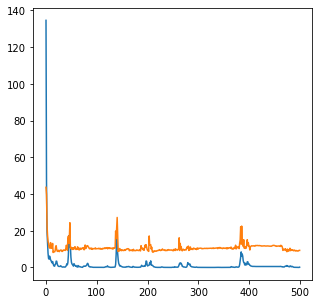

In [57]:
losses = pd.DataFrame(model_history.history)
plt.figure(figsize=(5,5))
plt.plot(losses[['loss','val_loss']])


Text(0.5, 1.0, 'Training Dataset')

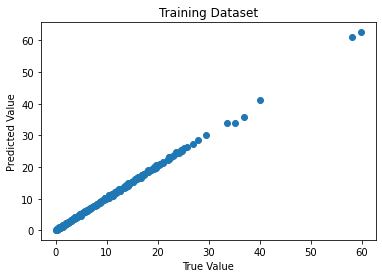

In [58]:
plt.scatter(Y_train,Y_train_pred)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Training Dataset')

Text(0.5, 1.0, 'Test Dataset')

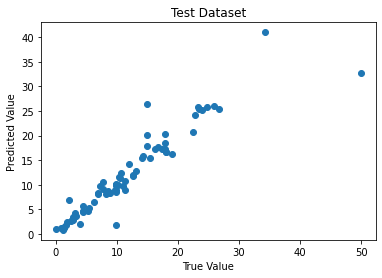

In [59]:
plt.scatter(Y_test,Y_test_pred)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Test Dataset')

In [60]:
print('Training Score')
training_score = model.evaluate(X_train,Y_train,verbose=1)


Training Score
10/10 [==============================] - 0s 2ms/step - loss: 0.1579 - mae: 0.2542 - mse: 0.1579


In [61]:
print('Test Score')
test_score = model.evaluate(X_test,Y_test,verbose=1)


Test Score
3/3 [==============================] - 0s 3ms/step - loss: 9.3055 - mae: 1.6099 - mse: 9.3055


In [62]:
from sklearn.metrics import r2_score
r2_score_train=r2_score(Y_train,Y_train_pred)
r2_score_test=r2_score(Y_test,Y_test_pred)

In [63]:
print('Training r2 score=',r2_score_train )
print('Test r2 score=',r2_score_test )

Training r2 score= 0.9978919886437247
Test r2 score= 0.8752582408412208
